In [624]:
#Importing Python packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [625]:
#Importing dataframes
live_activations_csv = pd.read_csv(r'C:\Users\yatesa\Documents\Data Analytics Course\Activations_2022.csv', parse_dates = ['account_open_date'], dayfirst=True, index_col='account')
lapsed_vs_still_actives_csv = pd.read_csv(r'C:\Users\yatesa\Documents\Data Analytics Course\lapsed_vs_still_actives_2022.csv', index_col='account')

In [626]:
#Assessing size of dataframe
live_activations_csv.shape

(531, 23)

In [627]:
#Assessing data types
live_activations_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 1 to 509
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   brand_nk                   531 non-null    object        
 1   first_placed_date_ukt      531 non-null    object        
 2   first_placed_hour_ukt      531 non-null    int64         
 3   first_placed_datetime_ukt  531 non-null    object        
 4   account_open_date          531 non-null    datetime64[ns]
 5   region_category            531 non-null    object        
 6   country_region             531 non-null    object        
 7   country                    531 non-null    object        
 8   first_placed_product       531 non-null    object        
 9   marketing_channel          531 non-null    object        
 10  marketing_subchannel       531 non-null    object        
 11  partner_id                 531 non-null    object        
 12  partner_

In [628]:
#Creating a brand and location specific dataframe
live_activations_bf_uk = live_activations_csv[(live_activations_csv["brand_nk"] == "BF") & (live_activations_csv["country_region"] == "UK & Ireland")]
print(live_activations_bf_uk.head())

        brand_nk first_placed_date_ukt  first_placed_hour_ukt  \
account                                                         
1             BF            20/03/2023                      8   
2             BF            20/03/2023                      8   
5             BF            20/03/2023                     10   
11            BF            20/03/2023                      1   
12            BF            20/03/2023                      1   

        first_placed_datetime_ukt account_open_date region_category  \
account                                                               
1                20/03/2023 08:09        2022-12-03    UK & Ireland   
2                20/03/2023 08:46        2022-12-03    UK & Ireland   
5                20/03/2023 10:12        2022-12-06    UK & Ireland   
11               20/03/2023 01:17        2022-12-18    UK & Ireland   
12               20/03/2023 01:07        2022-12-09    UK & Ireland   

        country_region         country first_p

In [629]:
#Selecting relevant columns for dataframe
live_activations_bf_uk_final = live_activations_bf_uk.loc[:, ["brand_nk", "account_open_date", "country_region", "first_placed_product", "marketing_channel", "reg_device"]]
print(live_activations_bf_uk_final.head())

        brand_nk account_open_date country_region first_placed_product  \
account                                                                  
1             BF        2022-12-03   UK & Ireland                  UGE   
2             BF        2022-12-03   UK & Ireland           Sportsbook   
5             BF        2022-12-06   UK & Ireland           Sportsbook   
11            BF        2022-12-18   UK & Ireland                  UGE   
12            BF        2022-12-09   UK & Ireland                Poker   

        marketing_channel reg_device  
account                               
1                     SEO     Mobile  
2                  Direct     Mobile  
5                  Direct        Web  
11             Affiliates     Mobile  
12                    SEO        Web  


In [630]:
#Replacing values
live_activations_bf_uk_final = live_activations_bf_uk_final.replace("UK & Ireland", "UKI")
print(live_activations_bf_uk_final.head())

        brand_nk account_open_date country_region first_placed_product  \
account                                                                  
1             BF        2022-12-03            UKI                  UGE   
2             BF        2022-12-03            UKI           Sportsbook   
5             BF        2022-12-06            UKI           Sportsbook   
11            BF        2022-12-18            UKI                  UGE   
12            BF        2022-12-09            UKI                Poker   

        marketing_channel reg_device  
account                               
1                     SEO     Mobile  
2                  Direct     Mobile  
5                  Direct        Web  
11             Affiliates     Mobile  
12                    SEO        Web  


In [631]:
#Renaming columns
live_activations_bf_uk_final.rename(columns = {"brand_nk" : "brand", "account_open_date" : "account open date", "country_region" : "country", "first_placed_product" : "first product played", "marketing_channel" : "channel", "reg_device" : "device"}, inplace = True)
print(live_activations_bf_uk_final.head())

        brand account open date country first product played     channel  \
account                                                                    
1          BF        2022-12-03     UKI                  UGE         SEO   
2          BF        2022-12-03     UKI           Sportsbook      Direct   
5          BF        2022-12-06     UKI           Sportsbook      Direct   
11         BF        2022-12-18     UKI                  UGE  Affiliates   
12         BF        2022-12-09     UKI                Poker         SEO   

         device  
account          
1        Mobile  
2        Mobile  
5           Web  
11       Mobile  
12          Web  


In [632]:
#Merging datasets on account column
live_activations_vs_still_actives = live_activations_bf_uk_final.merge(lapsed_vs_still_actives_csv, on='account', how='left')
print(live_activations_vs_still_actives)

        brand account open date country first product played     channel  \
account                                                                    
1          BF        2022-12-03     UKI                  UGE         SEO   
2          BF        2022-12-03     UKI           Sportsbook      Direct   
2          BF        2022-12-03     UKI           Sportsbook      Direct   
5          BF        2022-12-06     UKI           Sportsbook      Direct   
11         BF        2022-12-18     UKI                  UGE  Affiliates   
...       ...               ...     ...                  ...         ...   
289        BF        2022-12-18     UKI           Sportsbook      Direct   
292        BF        2022-12-11     UKI                  UGE         SEO   
294        BF        2022-12-16     UKI           Sportsbook      Direct   
296        BF        2022-12-09     UKI                  UGE      Direct   
300        BF        2022-12-01     UKI                  UGE      Direct   

         de

In [633]:
#Changing column name
live_activations_vs_still_actives.rename(columns = {"theoretical_net_revenue" : "theo net rev"}, inplace = True)
print(live_activations_vs_still_actives.head())

        brand account open date country first product played     channel  \
account                                                                    
1          BF        2022-12-03     UKI                  UGE         SEO   
2          BF        2022-12-03     UKI           Sportsbook      Direct   
2          BF        2022-12-03     UKI           Sportsbook      Direct   
5          BF        2022-12-06     UKI           Sportsbook      Direct   
11         BF        2022-12-18     UKI                  UGE  Affiliates   

         device lifestage theo net rev  
account                                 
1        Mobile    active       £2,750  
2        Mobile    active       £2,750  
2        Mobile    active         £800  
5           Web    lapsed       £2,750  
11       Mobile    active         £300  


In [634]:
#Adding column to specify paid / unpaid activity
live_activations_vs_still_actives["cost"] = live_activations_vs_still_actives.apply(lambda x: "organic" if (x["channel"]=="SEO" or x["channel"]=="Direct") else "paid", axis=1)
print(live_activations_vs_still_actives.head())

        brand account open date country first product played     channel  \
account                                                                    
1          BF        2022-12-03     UKI                  UGE         SEO   
2          BF        2022-12-03     UKI           Sportsbook      Direct   
2          BF        2022-12-03     UKI           Sportsbook      Direct   
5          BF        2022-12-06     UKI           Sportsbook      Direct   
11         BF        2022-12-18     UKI                  UGE  Affiliates   

         device lifestage theo net rev     cost  
account                                          
1        Mobile    active       £2,750  organic  
2        Mobile    active       £2,750  organic  
2        Mobile    active         £800  organic  
5           Web    lapsed       £2,750  organic  
11       Mobile    active         £300     paid  


In [635]:
#Filling in blanks on the theo net rev column as less than £0
live_activations_vs_still_actives.fillna("negative", inplace=True)
live_activations_vs_still_actives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1 to 300
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   brand                 139 non-null    object        
 1   account open date     139 non-null    datetime64[ns]
 2   country               139 non-null    object        
 3   first product played  139 non-null    object        
 4   channel               139 non-null    object        
 5   device                139 non-null    object        
 6   lifestage             139 non-null    object        
 7   theo net rev          139 non-null    object        
 8   cost                  139 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 10.9+ KB


In [636]:
#Adding column to determine value tier
def condition(x):
    if x=="£8,500" or x=="£2,750":
        return "priority"
    elif x=="£1,500" or x=="£800" or x=="£300" or x=="£100":
        return "mid value"
    else:
        return 'low value'
    
live_activations_vs_still_actives["value tier"] = live_activations_vs_still_actives["theo net rev"].apply(condition)
print(live_activations_vs_still_actives.head())

        brand account open date country first product played     channel  \
account                                                                    
1          BF        2022-12-03     UKI                  UGE         SEO   
2          BF        2022-12-03     UKI           Sportsbook      Direct   
2          BF        2022-12-03     UKI           Sportsbook      Direct   
5          BF        2022-12-06     UKI           Sportsbook      Direct   
11         BF        2022-12-18     UKI                  UGE  Affiliates   

         device lifestage theo net rev     cost value tier  
account                                                     
1        Mobile    active       £2,750  organic   priority  
2        Mobile    active       £2,750  organic   priority  
2        Mobile    active         £800  organic  mid value  
5           Web    lapsed       £2,750  organic   priority  
11       Mobile    active         £300     paid  mid value  


In [637]:
#Grouping the data to visualise for analysis on channel vs value tier and saving as a separate DF
channel_vs_vt = live_activations_vs_still_actives.groupby(['value tier', 'channel']) ['lifestage'].count()
print(channel_vs_vt)

value tier  channel             
low value   Affiliates               5
            Direct                   3
            PPC (inc Competitor)     1
            PPC Brand                2
            RAE                      2
            SEO                      7
mid value   Affiliates              15
            Direct                  31
            PPC (inc Competitor)     2
            PPC Brand                1
            RAE                      3
            SEO                     10
priority    Affiliates               1
            Direct                  46
            PPC Brand                1
            PPC UAC                  1
            SEO                      8
Name: lifestage, dtype: int64


In [638]:
#Grouping the data to visualise for analysis on lapsed vs channel and saving as a separate DF
lapsed_vs_channel = live_activations_vs_still_actives.groupby(['lifestage', 'channel']) ['value tier'].count()
print(lapsed_vs_channel)

lifestage  channel             
active     Affiliates              12
           Direct                  51
           PPC (inc Competitor)     1
           PPC Brand                2
           PPC UAC                  1
           RAE                      3
           SEO                     13
lapsed     Affiliates               9
           Direct                  29
           PPC (inc Competitor)     2
           PPC Brand                2
           RAE                      2
           SEO                     12
Name: value tier, dtype: int64


<AxesSubplot:title={'center':'Active vs Lapsed'}, ylabel='lifestage'>

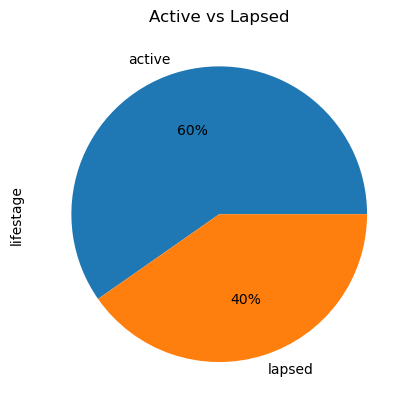

In [639]:
#Pie chart to visualise overall channel split
active_vs_lapsed = live_activations_vs_still_actives.groupby(['lifestage']) ['lifestage'].count()
active_vs_lapsed.plot(kind='pie', autopct='%1.0f%%', title='Active vs Lapsed')

[Text(0.5, 1.0, 'Lifestage vs Channel')]

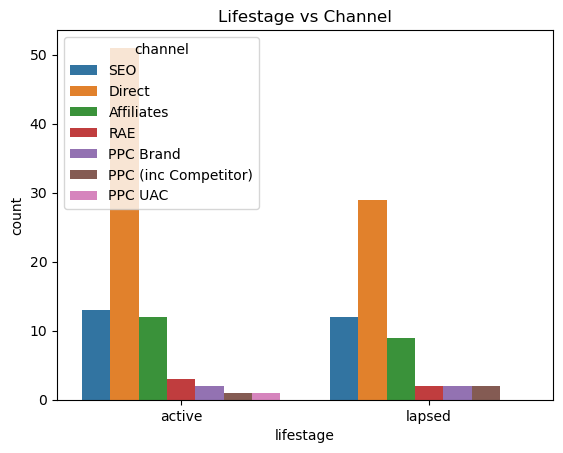

In [645]:
#Creating second chart to include channel aquisition
sns.countplot(data=live_activations_vs_still_actives, x='lifestage', hue='channel').set(title='Lifestage vs Channel')

In [ ]:
#Creating third chart to review value tiers
sns.countplot(data=live_activations_vs_still_actives, x='value tier', hue='channel').set(title='Value Tier vs Channel')

<AxesSubplot:title={'center':'Channel Overview'}, ylabel='channel'>

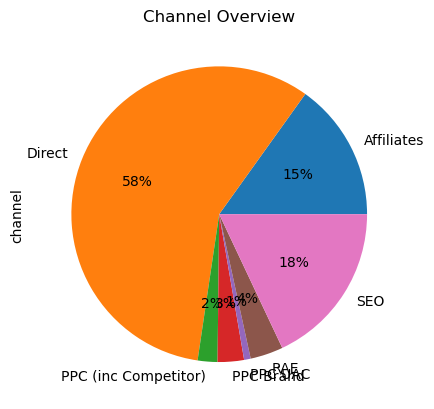

In [642]:
#Pie chart to visualise overall channel split
channel_counts = live_activations_vs_still_actives.groupby(['channel']) ['channel'].count()
channel_counts.plot(kind='pie', autopct='%1.0f%%', title='Channel Overview')

In [643]:
#Creating a chart to understand paid and non paid activity vs value tiers
cost_vs_vt = live_activations_vs_still_actives[['cost', 'value tier']].count()
print(cost_vs_vt)

cost          139
value tier    139
dtype: int64


<AxesSubplot:title={'center':'Lapsed vs Priority'}, xlabel='channel'>

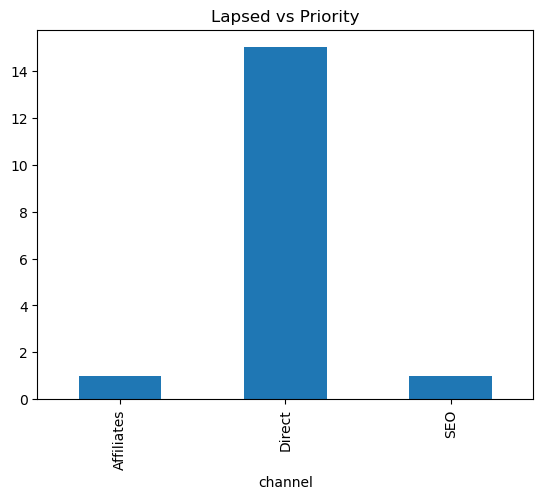

In [656]:
#Creating a dataframe and visual chart so identify lapsed high priority customers vs channel aquisition
lapsed_vs_priority = lapsed_vs_priority = live_activations_vs_still_actives[(live_activations_vs_still_actives["lifestage"] == "lapsed") & (live_activations_vs_still_actives["value tier"] == "priority")]
lapsed_vs_priority_count = lapsed_vs_priority.groupby(['channel']) ['value tier'].count()
lapsed_vs_priority_count.plot(kind='bar', title='Lapsed vs Priority', xlabel='channel')